İlk amacımız, farklı eniyileme algoritmalarının davranışları hakkında bir sezgi kazanmak. Bunun için iki değişkenli bir fonksiyon alacağız, ve algoritmanın en küçük noktaya yaklaşırken attığı adımları x-y düzleminde çizdireceğiz.

Kulanacağımız algoritmaların matematiksel ayrıntıları için: İlker Birbil, 
[Hesaplamalı Tarifler I: Newton ve Benzeri Metodlar](http://people.sabanciuniv.edu/sibirbil/MD/MD_SIB_Haziran16.html), 2016.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Rosenbrock fonksiyonu

İki değişkenli Rosenbrock fonksiyonunu tanımlayalım:
$$f(x,y)=10(y-x^2)^2 + (1-x)^2$$

Değişkenlere göre kısmi türev alarak gradyant vektörü bulunur:
$$\nabla f = \left[\begin{array}{c}
\frac{\partial f}{\partial x} \\\
\frac{\partial f}{\partial y}
\end{array}\right]
=
\left[\begin{array}{c}
40x^3 - 40xy +2x - 2 \\\
20(y-x^2)
\end{array}\right]$$

İkinci dereceden kısmi türevleri alarak Hesse matrisi ("Hessian") bulunur:
$$\nabla^2 f 
= \left[
\begin{array}{c}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x\partial y} \\\
\frac{\partial^2 f}{\partial x\partial y} & \frac{\partial^2 f}{\partial y^2}
\end{array}\right]
= \left[
\begin{array}{c}
120x^2-40y+2 & -40x \\\
-40x & 20
\end{array}\right]$$

Fonksiyonun tek minimumu $(x,y)=(1,1)$ noktasındadır; minimum değer sıfırdır.

Bu matematiksel tanımları kodlayalım:

In [2]:
def ros(x):
    return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
def ros_grad(x):
    return np.array([40*x[0]**3 - 40*x[0]*x[1] + 2*x[0] - 2, 20*(x[1]-x[0]**2)])
def ros_hess(x):
    return np.array([[120*x[0]**2 - 40*x[1] + 2, -40*x[0]],[-40*x[0], 20]])

Ayrıca, fonksiyonun yapısını görebilmek için x-y düzlemindeki eş eğrileri çizecek bir kod hazırlayalım.

In [3]:
def rosenbrock_eşeğriler(xmin, xmax, ymin, ymax, n_egri=50, doldur=True):

    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x,y)
    Z = 10*(Y-X**2)**2 + (1-X)**2
    if doldur:
        plt.contourf(X,Y,Z,n_egri); # araları dolu eşeğriler çiz
    else:
        plt.contour(X,Y,Z,n_egri); # araları doldurmadan eşeğriler çiz
    plt.scatter(1,1,marker="x",s=50,color="r");  # minimum noktasını işaretle

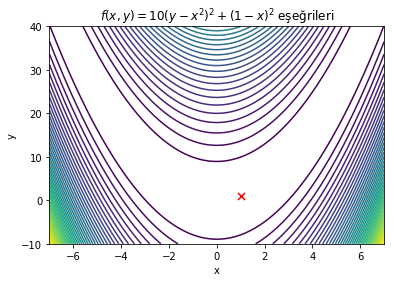

In [4]:
rosenbrock_eşeğriler(-7,7, -10, 40, doldur=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ eşeğrileri");

## Yokuş aşağı iniş, eşit adımlar

(gradient descent, steepest descent)

En basit, sezgiye en uygun algoritma. Ancak istikrarsızlık problemi var.

In [5]:
def en_dik_iniş(hedef, gradient, başlangıç, tol=1e-6, maxiter=10000, adım=0.01):
    x = başlangıç
    iterno = 0
    x_liste = [x]   # her iterasyondaki (x,y) noktaları listesi
    f = hedef(x)
    f_liste = [hedef(x)]  # her iterasyondaki f(x,y) değerleri listesi
    g = gradient(x)

    while np.dot(g,g)>tol**2 and iterno < maxiter:
        x = x - adım*g
        
        f = hedef(x)
        if np.isnan(f):  # Algoritma ıraksar ve f değeri Inf olursa çık.
            break
                
        x_liste.append(x)
        f_liste.append(f)
        g = gradient(x)
        iterno += 1
        
    return np.array(x_liste), np.array(f_liste)

In [6]:
x, f = en_dik_iniş(ros, ros_grad, tol= 1e-9, başlangıç=[2,5], adım=0.005)

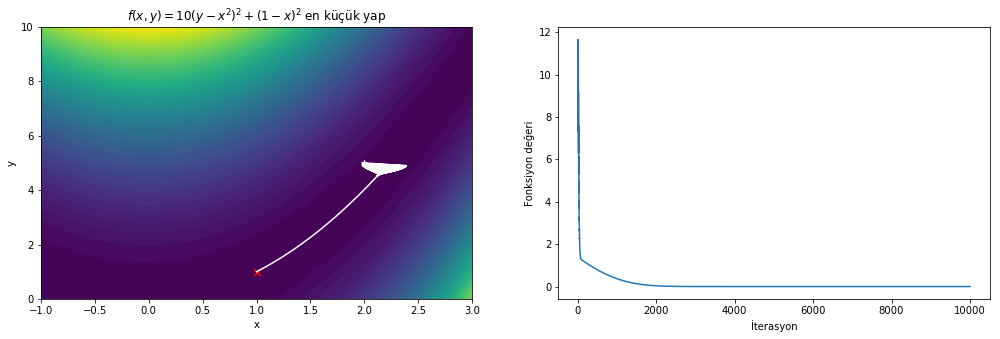

In [7]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
rosenbrock_eşeğriler(-1,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ en küçük yap");

# Başlangıç noktasını yıldızla göster.
plt.scatter(x[0,0],x[0,1], marker="*", color="w")

# Ara adım noktalarını göster.
plt.plot(x[:,0], x[:,1], c="w")

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("İterasyon")
plt.ylabel("Fonksiyon değeri");

Adım boyu çok küçük olduğu için minimuma yaklaşmak çok zaman alıyor. Daha az adımla ulaşsak daha iyi olur. Adım büyüklüğünü biraz yükseltelim ve tekrar çalıştıralım.

In [8]:
x, f = en_dik_iniş(ros, ros_grad, başlangıç=[2,5], adım=0.01, tol=1e-9)

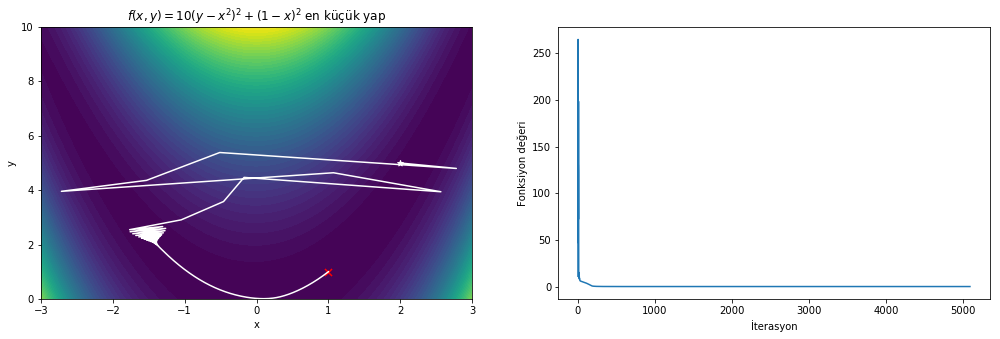

In [10]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
rosenbrock_eşeğriler(-3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ en küçük yap");

# Başlangıç noktasını yıldızla göster.
plt.scatter(x[0,0],x[0,1], marker="*", color="w")

# Ara adım noktalarını göster.
plt.plot(x[:,0], x[:,1], c="w")

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("İterasyon")
plt.ylabel("Fonksiyon değeri");

Daha büyük adım atarak daha az adımda hedefe ulaşıyoruz, ama algoritmanın davranışı garipleşiyor. Vadinin doğu kısmından batı kısmına zıplıyor, orada tekrar aşağı iniyor ve ters yönden minimuma yakınsıyor.

Bu davranış algoritmanın istikrarsızlığının bir göstergesi. Başka bir başlangıç noktasından başlayarak bu istikrarsızlığı daha iyi görebiliriz.

**Çalışma**

* $(x,y) = (2, 6)$ noktasından başlayarak, 0.01 adım büyüklüğü ile
* $(x,y) = (2, 6)$ noktasından başlayarak, 0.005 adım büyüklüğü ile
* Kendi isteğinize göre farklı başlangıç noktaları ve adım büyüklükleri ile

algoritmanın davranışını inceleyin.

## Yokuş aşağı iniş, geriye dönüşlü adım boyu kestirme (backtracking)

Minimuma hızlıca ulaşmak için adım boyunun mümkün olduğunca büyük olmasını istiyoruz, ama adım boyu büyüdüğü zaman algoritma istikrarsızlaşabiliyor. Üstelik, bir nokta için uygun olan adım boyu başka bir nokta için fazla büyük olabiliyor. Adım boyunu otomatik olarak belirleyebilmemiz lazım.

_Armijo şartı_ her adımda, bir öncekinden daha düşük bir fonksiyon değerine ulaşmamızı garantileyen bir eşitsizliktir.

$$f(x^{(k)} + \alpha p) \leq f_k + c\alpha\nabla f_k^\intercal p$$

Verilen bir $p$ yönünde, Armijo şartını kullanarak her iterasyonda en uygun adım büyüklüğünü belirleyebiliriz. Geriye dönüş algoritmasında $\alpha_0$ adım boyuyla başlarız ve yukarıdaki şart sağlanana kadar, 0 ile 1 arasında bir katsayıyla çarparak küçültürüz.

In [11]:
def en_dik_iniş_geridönüşlü(hedef, gradient, başlangıç,
                          tol=1e-9, maxiter=1000, adım0=0.5,
                          küçültme=0.9, c=0.5):
    x = başlangıç
    iterno = 0
    x_liste = [x]   # her iterasyondaki (x,y) noktaları listesi
    f = hedef(x)
    f_liste = [hedef(x)]  # her iterasyondaki f(x,y) değerleri listesi
    g = gradient(x)
    
    adım_liste = [adım0]
    
    while np.dot(g,g) > tol**2 and iterno < maxiter:
        adımboyu = adım0
        yön = -g
        # Armijo şartı sağlanana kadar adım boyunu küçült.
        while hedef(x+adımboyu*yön) >= f + c*adımboyu*np.dot(g,yön):
            adımboyu *= küçültme
        
        adım_liste.append(adımboyu)
        x = x + adımboyu*yön
        
        f = hedef(x)
        if np.isnan(f):  # Algoritma ıraksar ve f değeri Inf olursa çık.
            break
        
        x_liste.append(x)
        f_liste.append(f)
        g = gradient(x)
        iterno += 1
    
    return np.array(x_liste), np.array(f_liste), np.array(adım_liste)

In [12]:
x, f, a = en_dik_iniş_geridönüşlü(ros, ros_grad, adım0=0.5, başlangıç=[2,5])

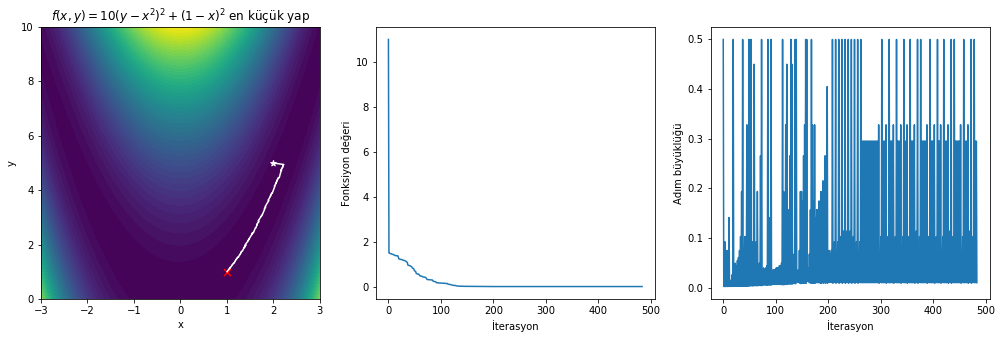

In [13]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
rosenbrock_eşeğriler(-3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ en küçük yap");

# Başlangıç noktasını yıldızla göster.
plt.scatter(x[0,0],x[0,1], marker="*", color="w")

# Ara adım noktalarını göster.
plt.plot(x[:,0], x[:,1], c="w")

plt.subplot(1,3,2)
plt.plot(f)
plt.xlabel("İterasyon")
plt.ylabel("Fonksiyon değeri")

plt.subplot(1,3,3)
plt.plot(a)
plt.xlabel("İterasyon")
plt.ylabel("Adım büyüklüğü");


__Çalışma__: Yukarıdaki algoritma her zaman yakınsıyor, ama bir sorunu var, adım boyunu hiç bir zaman büyütmüyor. Bu bazen gereksiz yere küçük adım atmaya sebep olabilir. `en_dik_iniş_geridönüşlü` fonksiyonunu öyle değiştirin ki, adım boyunu Armijo şartını bozmayacak derecede büyütebilsin.

__Çalışma__ _(seçimli)_: Geri dönüşlü arama döngüsünü öyle değiştirin ki, belli bir iterasyonu aştığında bir uyarı mesajı versin, ama programın işleyişini durdurmadan en son bulunan adım boyuyla devam etsin.

__Ödev__ _(seçimli)_: Fonksiyondaki `küçültme` ve `c` değerleriyle oynayarak (0 ve 1 arasında kalmaları şartıyla) yakınsamanın nasıl değiştiğini inceleyin. Değişik hedef fonksiyonları deneyin.

## Newton yöntemi

İkinci türev bilgisini kullanmaya dayalı olan _Newton yöntemi_ kullanıldığında, iterasyonlardaki güncelleme adımı yerel türevle değil, _Newton yönü_ dediğimiz vektörle belirlenir:
$$x_{k+1} = x_k - \alpha (\nabla^2 f_k)^{-1} \nabla f_k$$

Burada $\nabla^2 f_k$ yukarıda verdiğimiz Hesse matrisinin, $\nabla f_k$ ise gradyant vektörünün $x_k$ noktasındaki değeridir. $\alpha$ parametresi Newton yönündeki adım boyunu verir.

Aşağıdaki kodda $p_k = (\nabla^2 f_k)^{-1} \nabla f_k$ vektörünü hesaplamak için Hesse matrisinin tersini almak yerine, $(\nabla^2 f_k)p_k = \nabla f_k$ sistemini çözdürüyoruz. İkisi matematiksel olarak denk işlemlerdir, ama ikincisinin hesaplanması daha hızlıdır.

In [14]:
def newton(hedef, gradient, hessian, başlangıç,
           tol=1e-9, maxiter=1000):
    x = başlangıç
    iterno = 0
    x_liste = [x]
    f = hedef(x)
    f_liste = [f]
    
    g = gradient(x)
    while np.dot(g,g)>tol**2 and iterno < maxiter:
        h = hessian(x)
        x = x - np.linalg.solve(h,g)
        
        f = hedef(x)
        if np.isnan(f):  # Algoritma ıraksar ve f değeri Inf olursa çık.
            break
        
        x_liste.append(x)
        f_liste.append(f)
        g = gradient(x)
        iterno += 1
        
    return np.array(x_liste), np.array(f_liste)

In [15]:
x, f = newton(ros, ros_grad, ros_hess, başlangıç=[2,5])

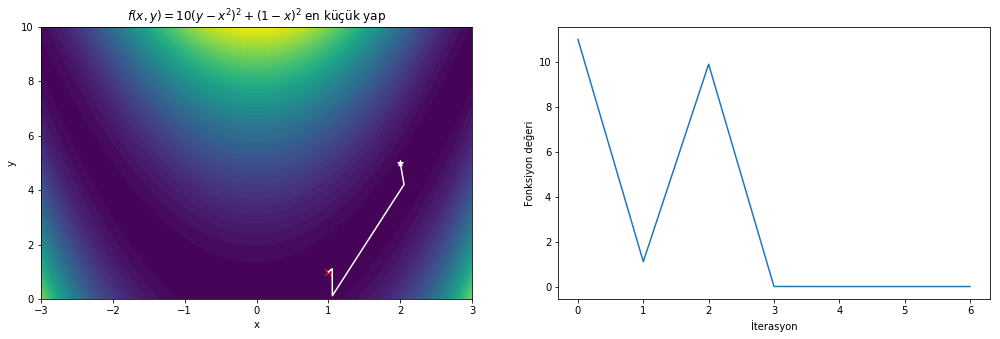

In [16]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
rosenbrock_eşeğriler(-3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ en küçük yap");

# Başlangıç noktasını yıldızla göster.
plt.scatter(x[0,0],x[0,1], marker="*", color="w")

# Ara adım noktalarını göster.
plt.plot(x[:,0], x[:,1], c="w")
plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("İterasyon")
plt.ylabel("Fonksiyon değeri");

__Çalışma__: Yukarıdaki algoritmaya geriye dönüşlü arama uygulayın.

## Newton benzeri yöntemler: BFGS

Newton yöntemi çok hızlı sonuç verse de, iki dezavantajı vardır:
1. Çok boyutlu sistemlerde Hesse matrisi çok büyük olur. O zaman da hem bu matrisi saklamak için gereken bellek miktarı hem de Newton yönünü hesaplamak için gerekli hesaplama yükü hızla büyür.
2. Hesse matrisinin terslenebilir oluşunun, veya Newton yönünün bir azalma sağladığının garantisi yoktur.

Bu yüzden, Hesse matrisinin kendisini değil, kullanışlı bir yaklaştırım olarak bir $B_k$ matrisi arıyoruz, öyle ki, $k$ adımındaki gidiş yönü $-B_k^{-1}\nabla f_k$ olsun. Notasyondan anlaşıldığı gibi bu matris sabit değil, fakat her adımda yeniden hesaplanıyor: $B_{k+1} = F(B_k)$

Matrisi her adımda ters çevirmekle uğraşmamak için, doğrudan terslerle çalışmak da mümkün. $B_k^{-1}\equiv H_k$ dersek, $H_k$ matrisleri üzerinden bir iterasyon yapabiliriz.

Çok boyutlu eniyilemede, özellikle yapay öğrenmede _state-of-the-art_ yöntem _BFGS_ algoritmasıdır. Bu algoritmada, yeni adım atma yönü $p_{k+1} = -H_{k+1}\nabla f_{k+1}$ şöyle hesaplanır:

$$H_{k+1} = \left(I - \frac{s_k y_k^\top}{y_k^\top s_k}\right)H_k\left(I - \frac{y_k s_k^\top}{y_k^\top s_k}\right) + \frac{s_k s_k^\top}{y_k^\top s_k}$$

Burada $s_k \equiv x_{k+1}-x_k$ ve $y_k \equiv \nabla f_{k+1} - \nabla f_k$ olarak tanımlanır. İlk adımda $H_0 = I$ alırız.


In [17]:
def BFGS(hedef, gradient, başlangıç, adım0=0.5, tol=1e-2, maxiter=1000,
        c=1e-4, küçültme=0.9):
    x = başlangıç
    d = len(x) # problemin boyutu
    iterno = 0
    x_liste = [x]
    f = hedef(x)
    f_liste = [f]
    H = np.matrix(np.identity(d))
    g = gradient(x)
    
    while np.dot(g,g) > tol**2 and iterno < maxiter:
        adımboyu = adım0
        yön = np.asarray(-np.dot(H,g))[0]
        
        # Armijo şartı sağlanana kadar adım boyunu küçült.
        while hedef(x+adımboyu*yön) >= f-c*adımboyu*np.dot(yön,g):
            adımboyu *= küçültme
        xyeni = x + adımboyu*yön
        gyeni = gradient(xyeni)
        s = xyeni - x
        y = gyeni - g

        # H'yi güncelle
        if np.dot(s,y) < 1e-8:
            H = np.matrix(np.identity(d))
        else:
            s = np.matrix(s).T
            y = np.matrix(y).T
            M1 = np.identity(d) - np.dot(s,y.T)/np.dot(y.T,s)
            M2 = np.identity(d) - np.dot(y,s.T)/np.dot(y.T,s)
            H = np.dot(np.dot(M1,H),M2) + np.dot(s,s.T)/np.dot(y.T,s)        

        f = hedef(xyeni)
        if np.isnan(f):  # Algoritma ıraksar ve f değeri Inf olursa çık.
            break

        x = xyeni
        g = gyeni
        
        x_liste.append(x)
        f_liste.append(f)

        iterno += 1
        
    return np.array(x_liste), np.array(f_liste)

In [18]:
x, f = BFGS(ros, ros_grad, başlangıç=[2,5])

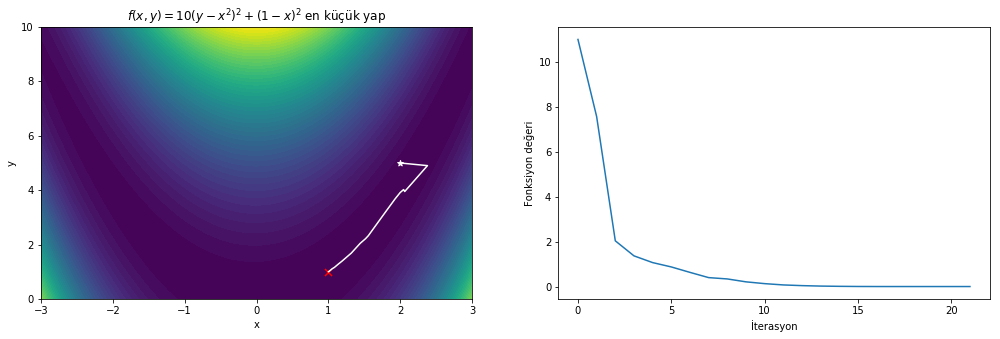

In [19]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
rosenbrock_eşeğriler(-3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$f(x,y)=10(y-x^2)^2 + (1-x)^2$ en küçük yap");

# Başlangıç noktasını yıldızla göster.
plt.scatter(x[0,0],x[0,1], marker="*", color="w")

# Ara adım noktalarını göster.
plt.plot(x[:,0], x[:,1], c="w")
plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("İterasyon")
plt.ylabel("Fonksiyon değeri");